In [1]:
!unzip data.zip

Archive:  data.zip
  inflating: fetal_health.csv        


In [4]:
#@title 1. 환경 설정: Google Drive 마운트 및 라이브러리 설치

# ----------------------------------------------------------------------
# 1. Google Drive 마운트
# (Colab에서 데이터 파일(fetal_health.csv)을 읽어오기 위해 필요합니다.)
# ----------------------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# ----------------------------------------------------------------------
# 2. 필수 라이브러리 설치
# (dtreeviz는 결정 트리를 시각화하기 위해 필요하며, Colab에 기본 설치되어 있지 않습니다.)
# (CatBoost, LightGBM 등도 설치를 확인합니다.)
# ----------------------------------------------------------------------
# !pip install dtreeviz catboost lightgbm xgboost scikit-learn numpy pandas matplotlib seaborn --quiet

print("\nLibraries installed and Google Drive mounted.")

#@title 2. 기본 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.auto import tqdm # (EDA 시각화 진행률 표시를 위해 추가)

# 시각화 설정
plt.style.use('ggplot')
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

# 머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

print("All libraries imported successfully.")


Libraries installed and Google Drive mounted.
All libraries imported successfully.


In [7]:
#@title 3. 데이터 로드

# ----------------------------------------------------------------------
# [중요!] 사용자의 Google Drive에 업로드된 CSV 파일의 *전체 경로*를 입력하세요.
# 예: '/content/drive/MyDrive/data/fetal_health.csv'
# ----------------------------------------------------------------------
DATA_PATH = "/content/fetal_health.csv" # <--- 이 경로를 수정하세요

try:
    df = pd.read_csv(DATA_PATH)
    print(f"Data loaded successfully from: {DATA_PATH}")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {DATA_PATH}")
    print("Please upload 'fetal_health.csv' to your Google Drive and update the DATA_PATH variable.")

# 데이터 샘플 확인
df.head()

Data loaded successfully from: /content/fetal_health.csv
Dataset shape: (2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
#@title 4. [EDA] 기본 데이터 탐색 (Null 값 및 정보)
# 데이터 정보 요약
print("--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_

In [9]:
print("\n--- Missing Values Check ---")
# Null 값이 있는지 확인 (이 데이터셋은 Null 값이 없음)
print(df.isnull().sum())


--- Missing Values Check ---
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_

In [10]:
print("\n--- Target Variable Unique Values ---")
# Target 변수(fetal_health)의 고유 값 확인
# 1.0 = Normal, 2.0 = Suspect, 3.0 = Pathological
print(df['fetal_health'].value_counts())


--- Target Variable Unique Values ---
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


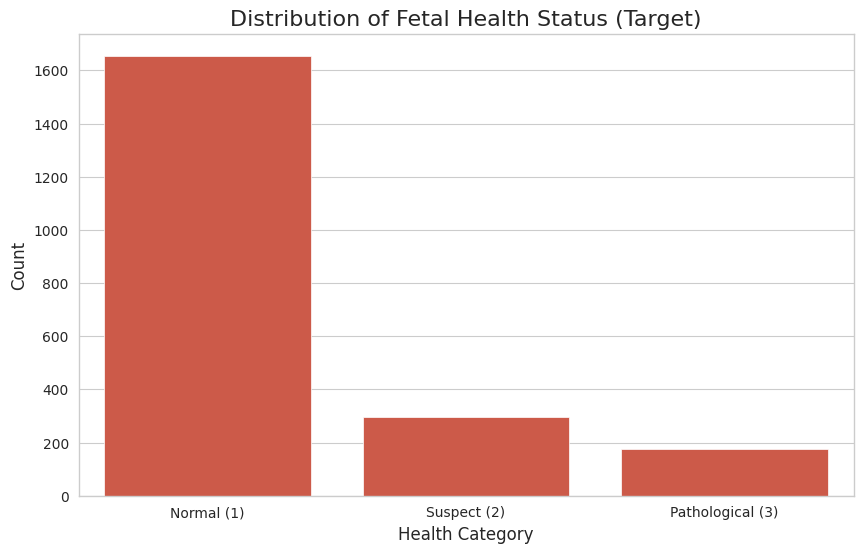


Analysis: The dataset is highly imbalanced.
Class 1 (Normal) significantly outnumbers Class 2 (Suspect) and Class 3 (Pathological).


In [11]:
#@title 5. [EDA] Target 분포 시각화 (영문 Plot)

# 타겟 변수(fetal_health)는 1.0, 2.0, 3.0으로 코딩되어 있습니다.
# 가독성을 위해 명시적인 레이블로 매핑해줍니다. (시각화용)
target_map = {1.0: 'Normal (1)', 2.0: 'Suspect (2)', 3.0: 'Pathological (3)'}
df['target_label'] = df['fetal_health'].map(target_map)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target_label', order=['Normal (1)', 'Suspect (2)', 'Pathological (3)'])

plt.title('Distribution of Fetal Health Status (Target)', fontsize=16)
plt.xlabel('Health Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

print("\nAnalysis: The dataset is highly imbalanced.")
print("Class 1 (Normal) significantly outnumbers Class 2 (Suspect) and Class 3 (Pathological).")



Plotting Feature Distributions across Target Classes (Violin Plots)...


Plotting Groups:   0%|          | 0/3 [00:00<?, ?it/s]

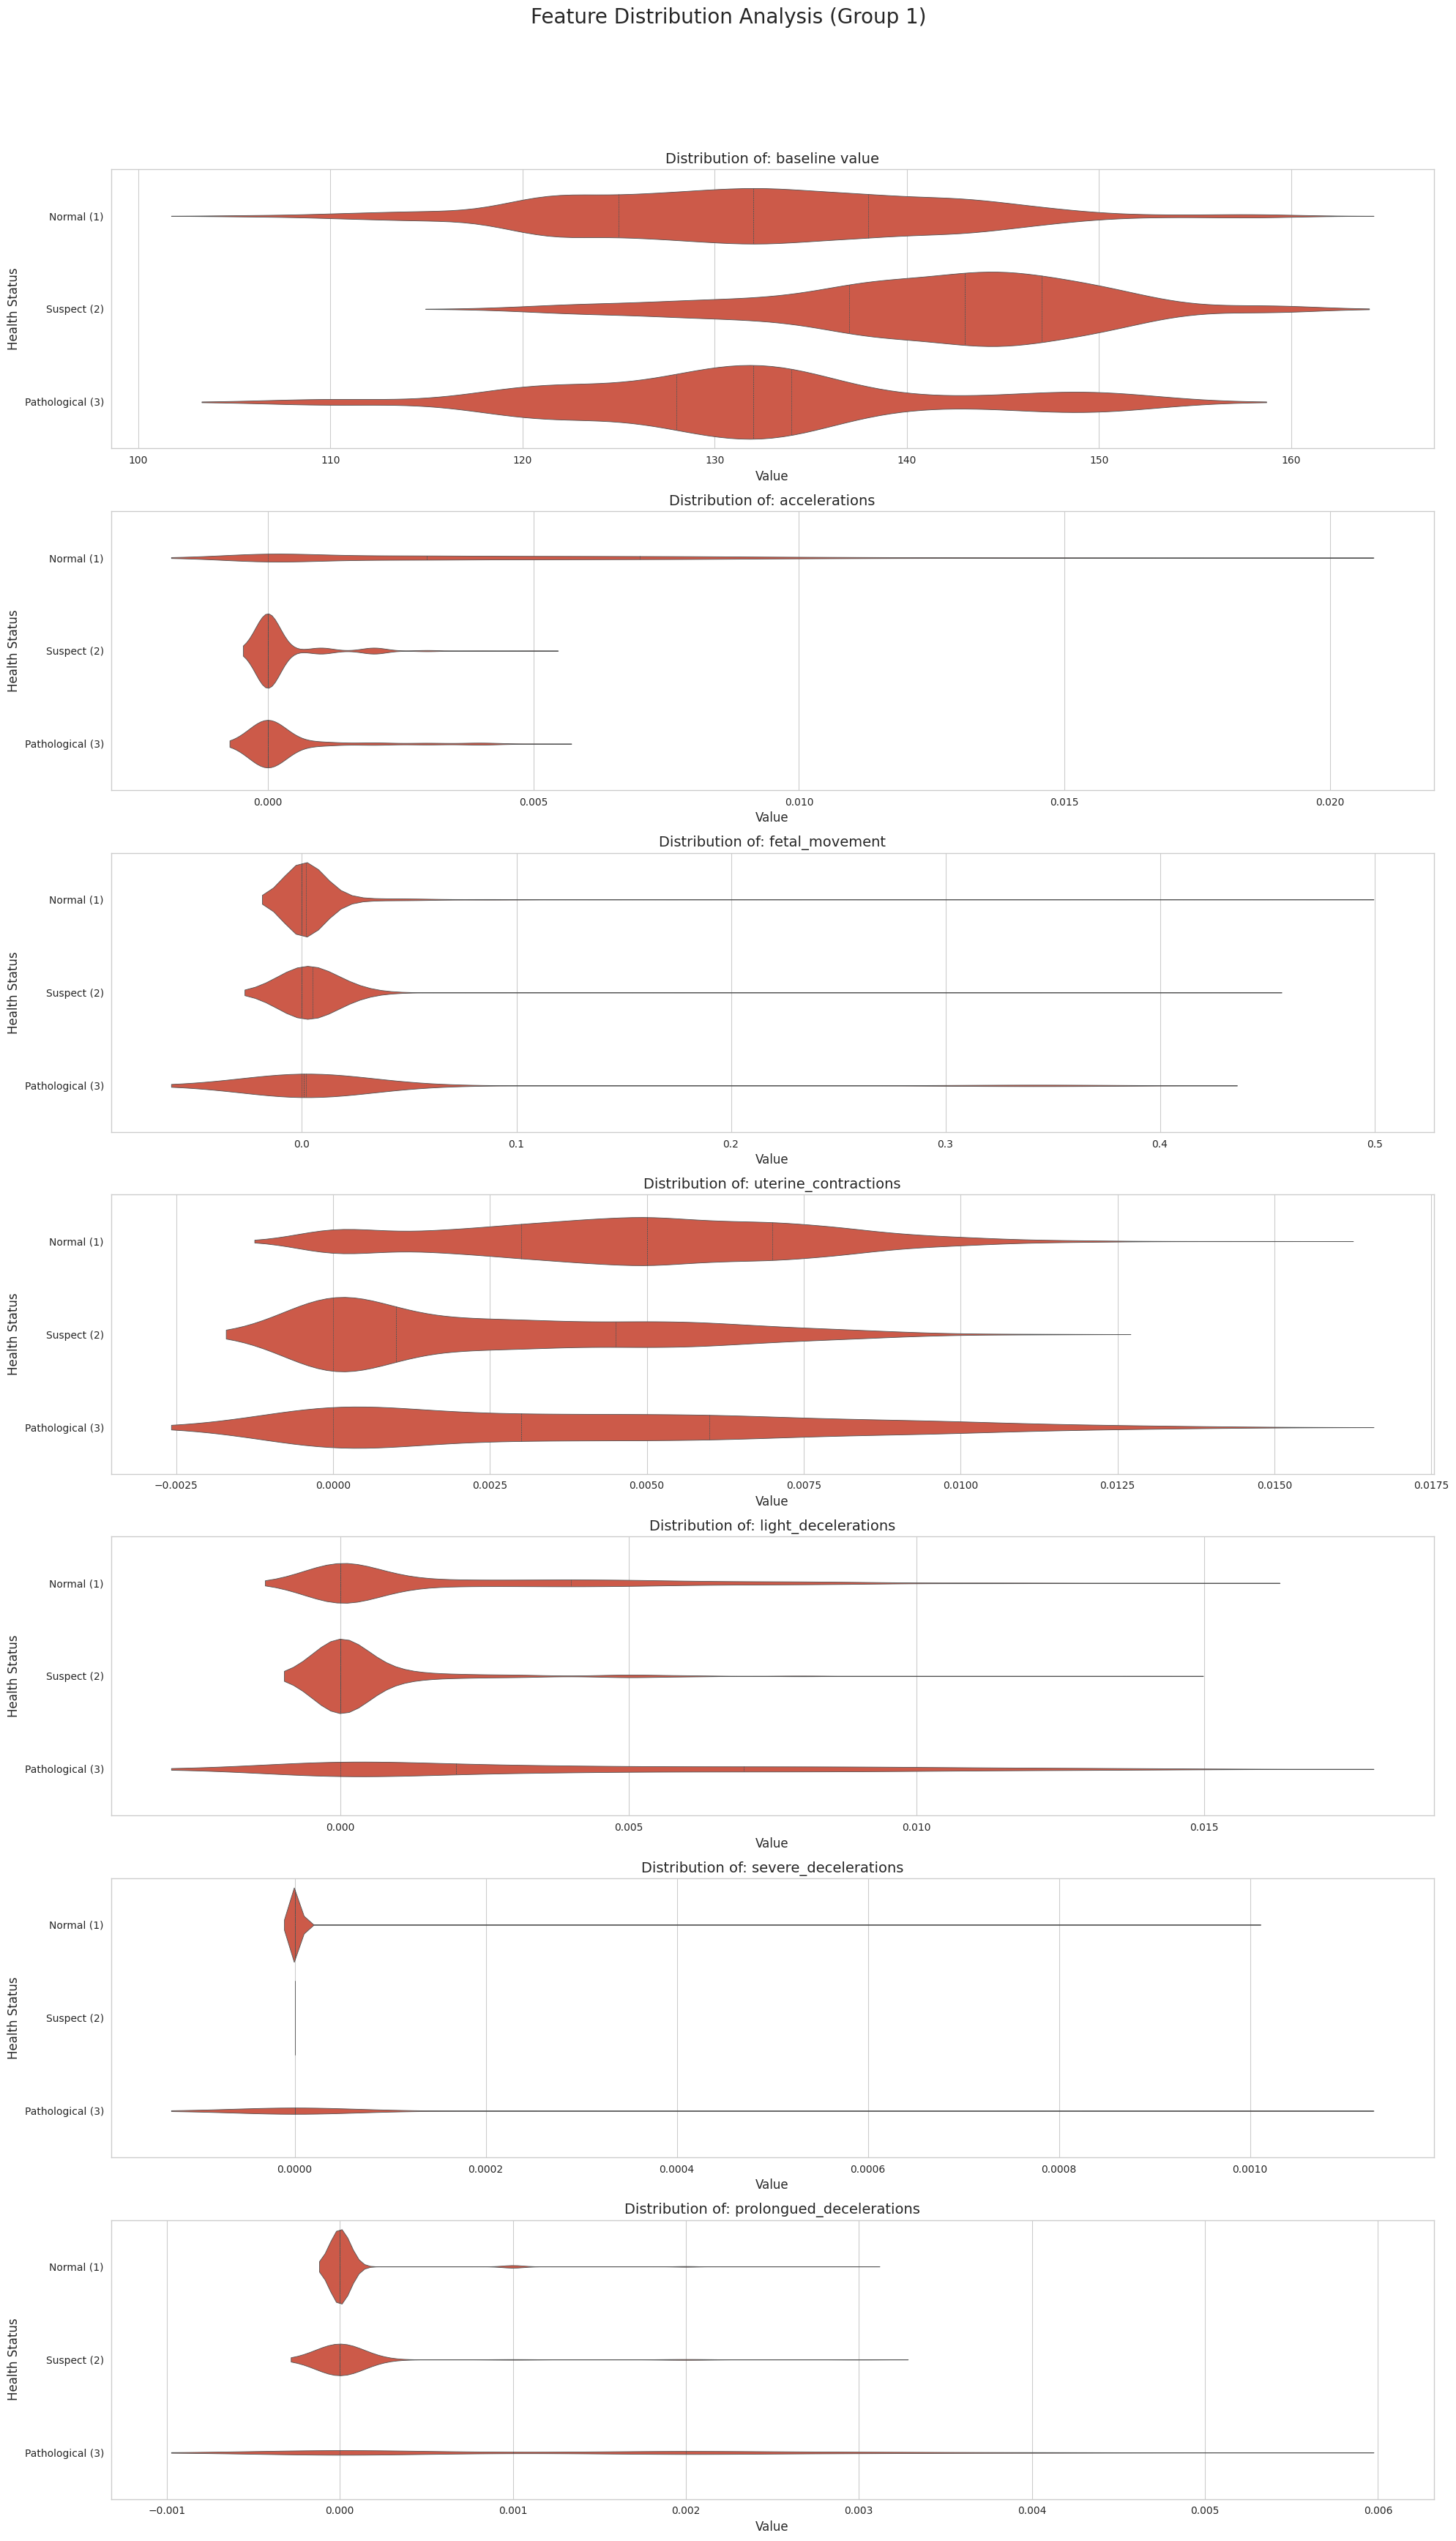

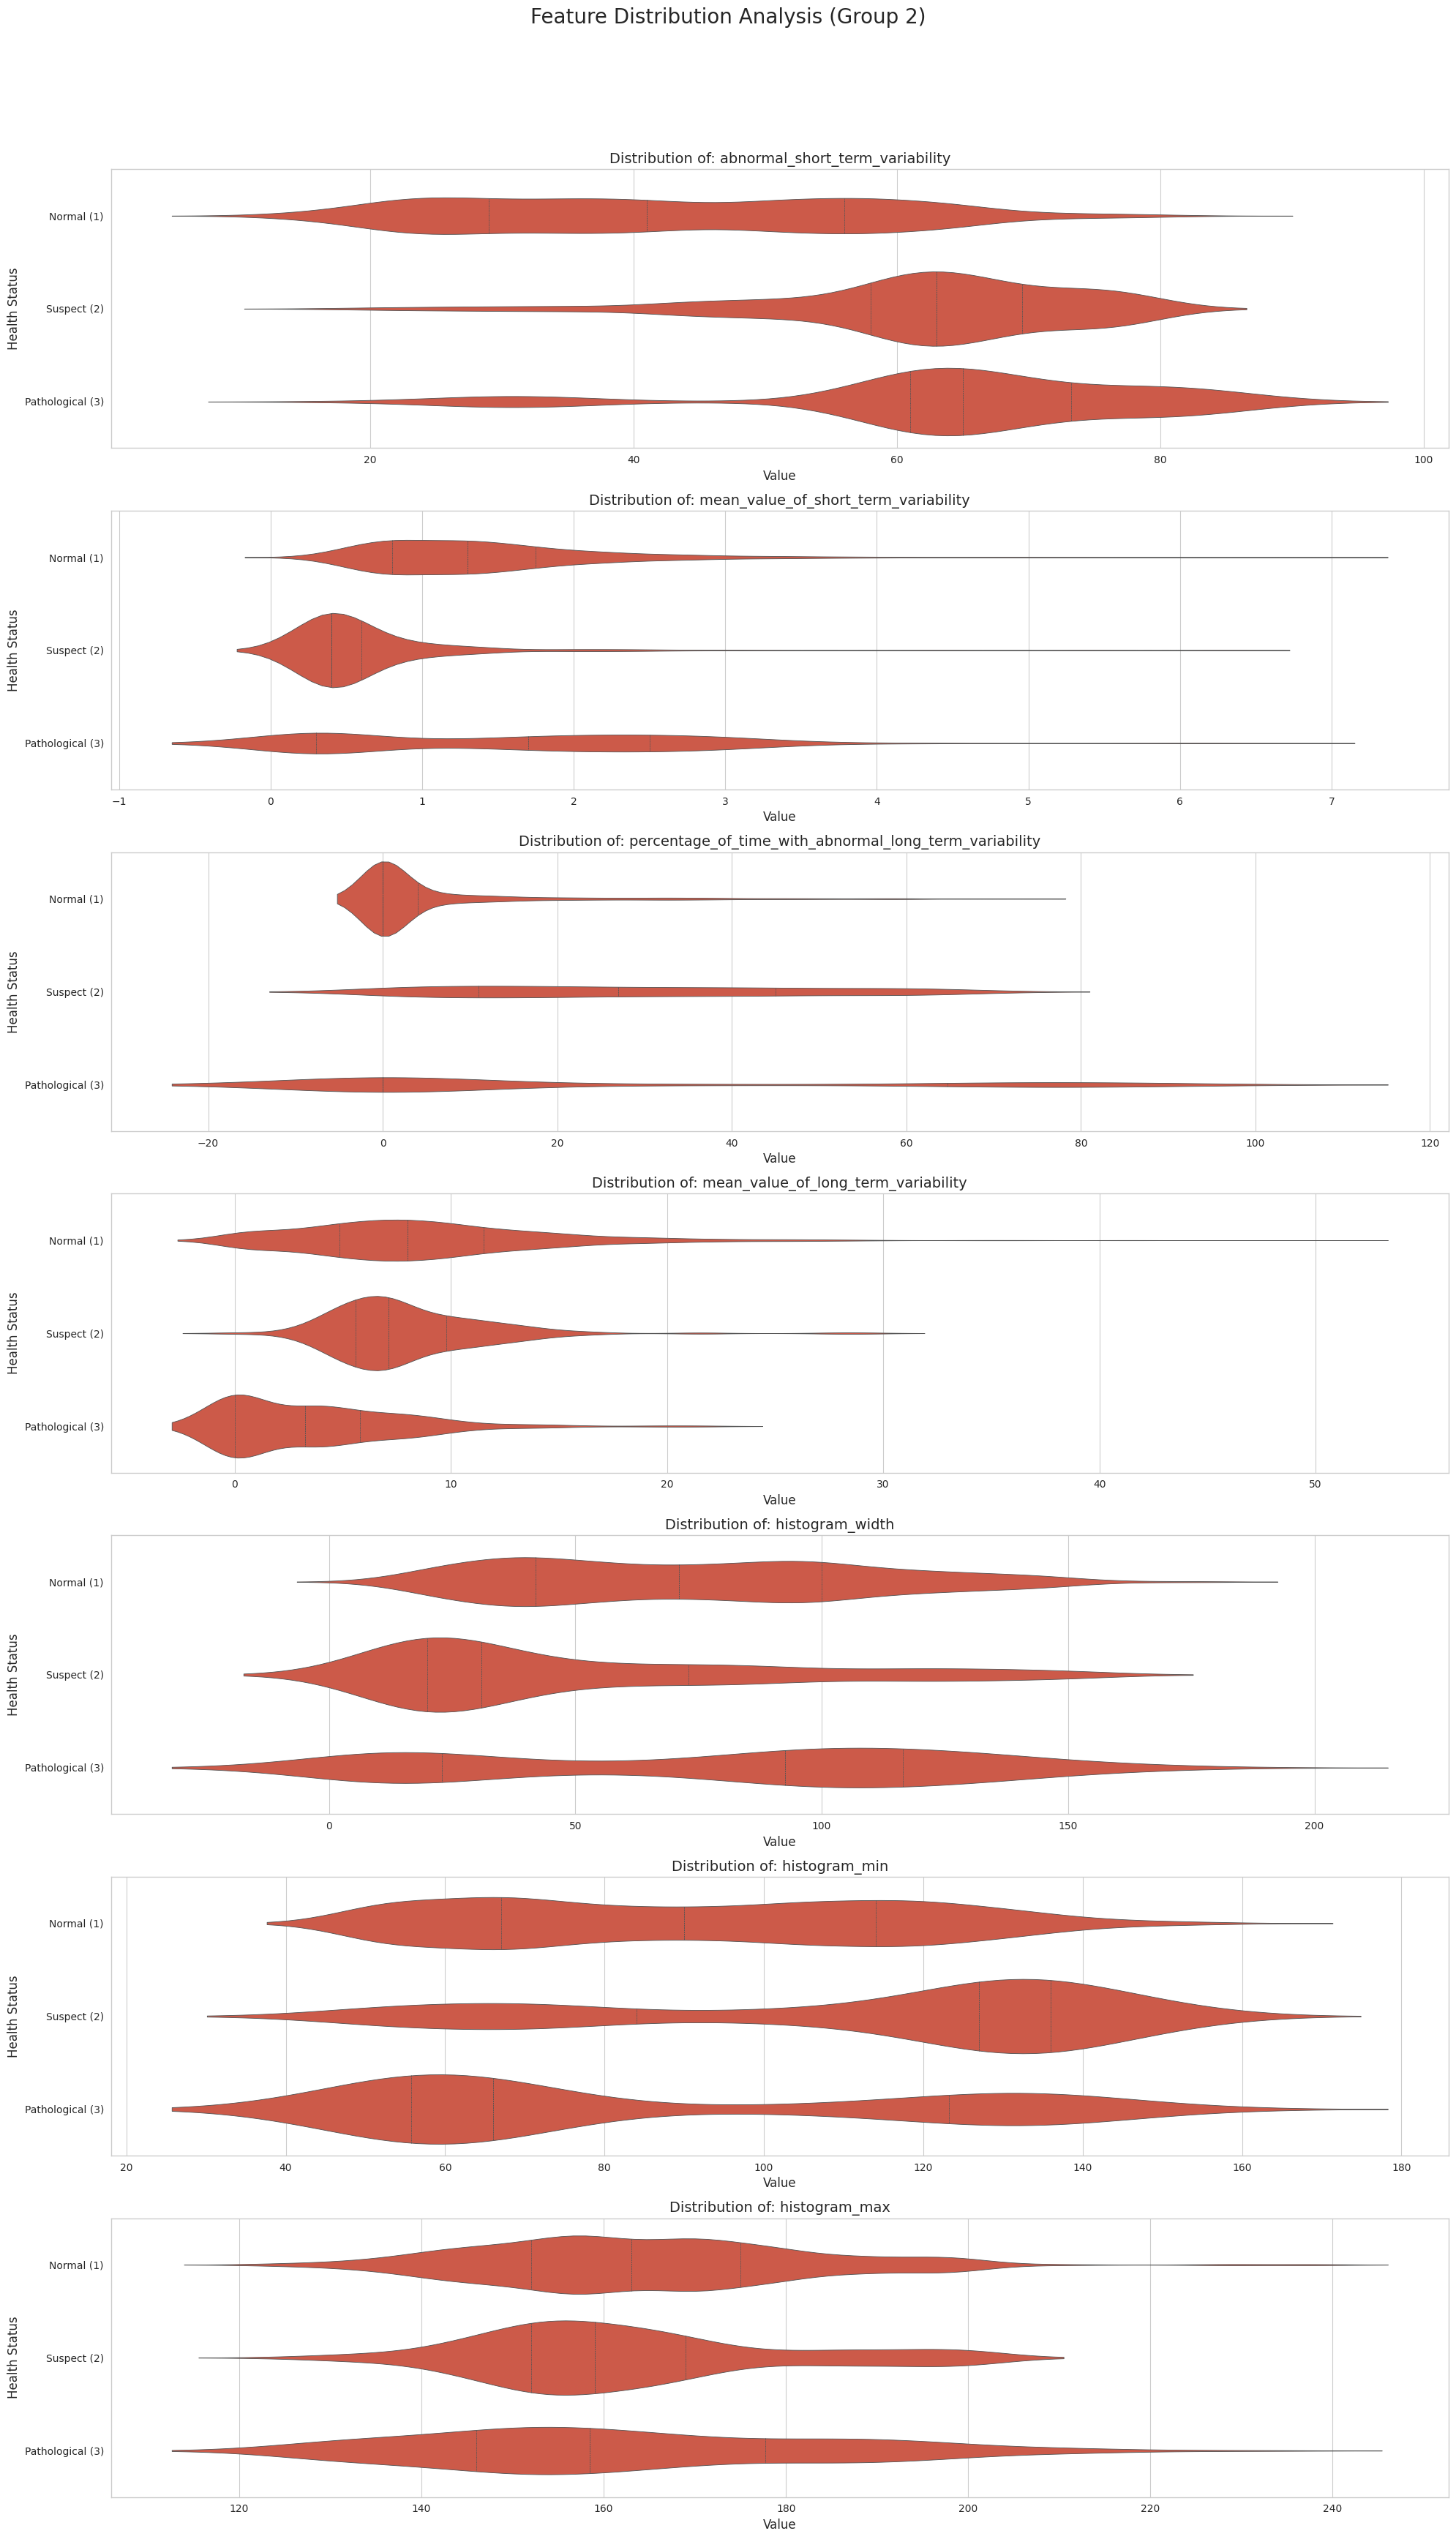

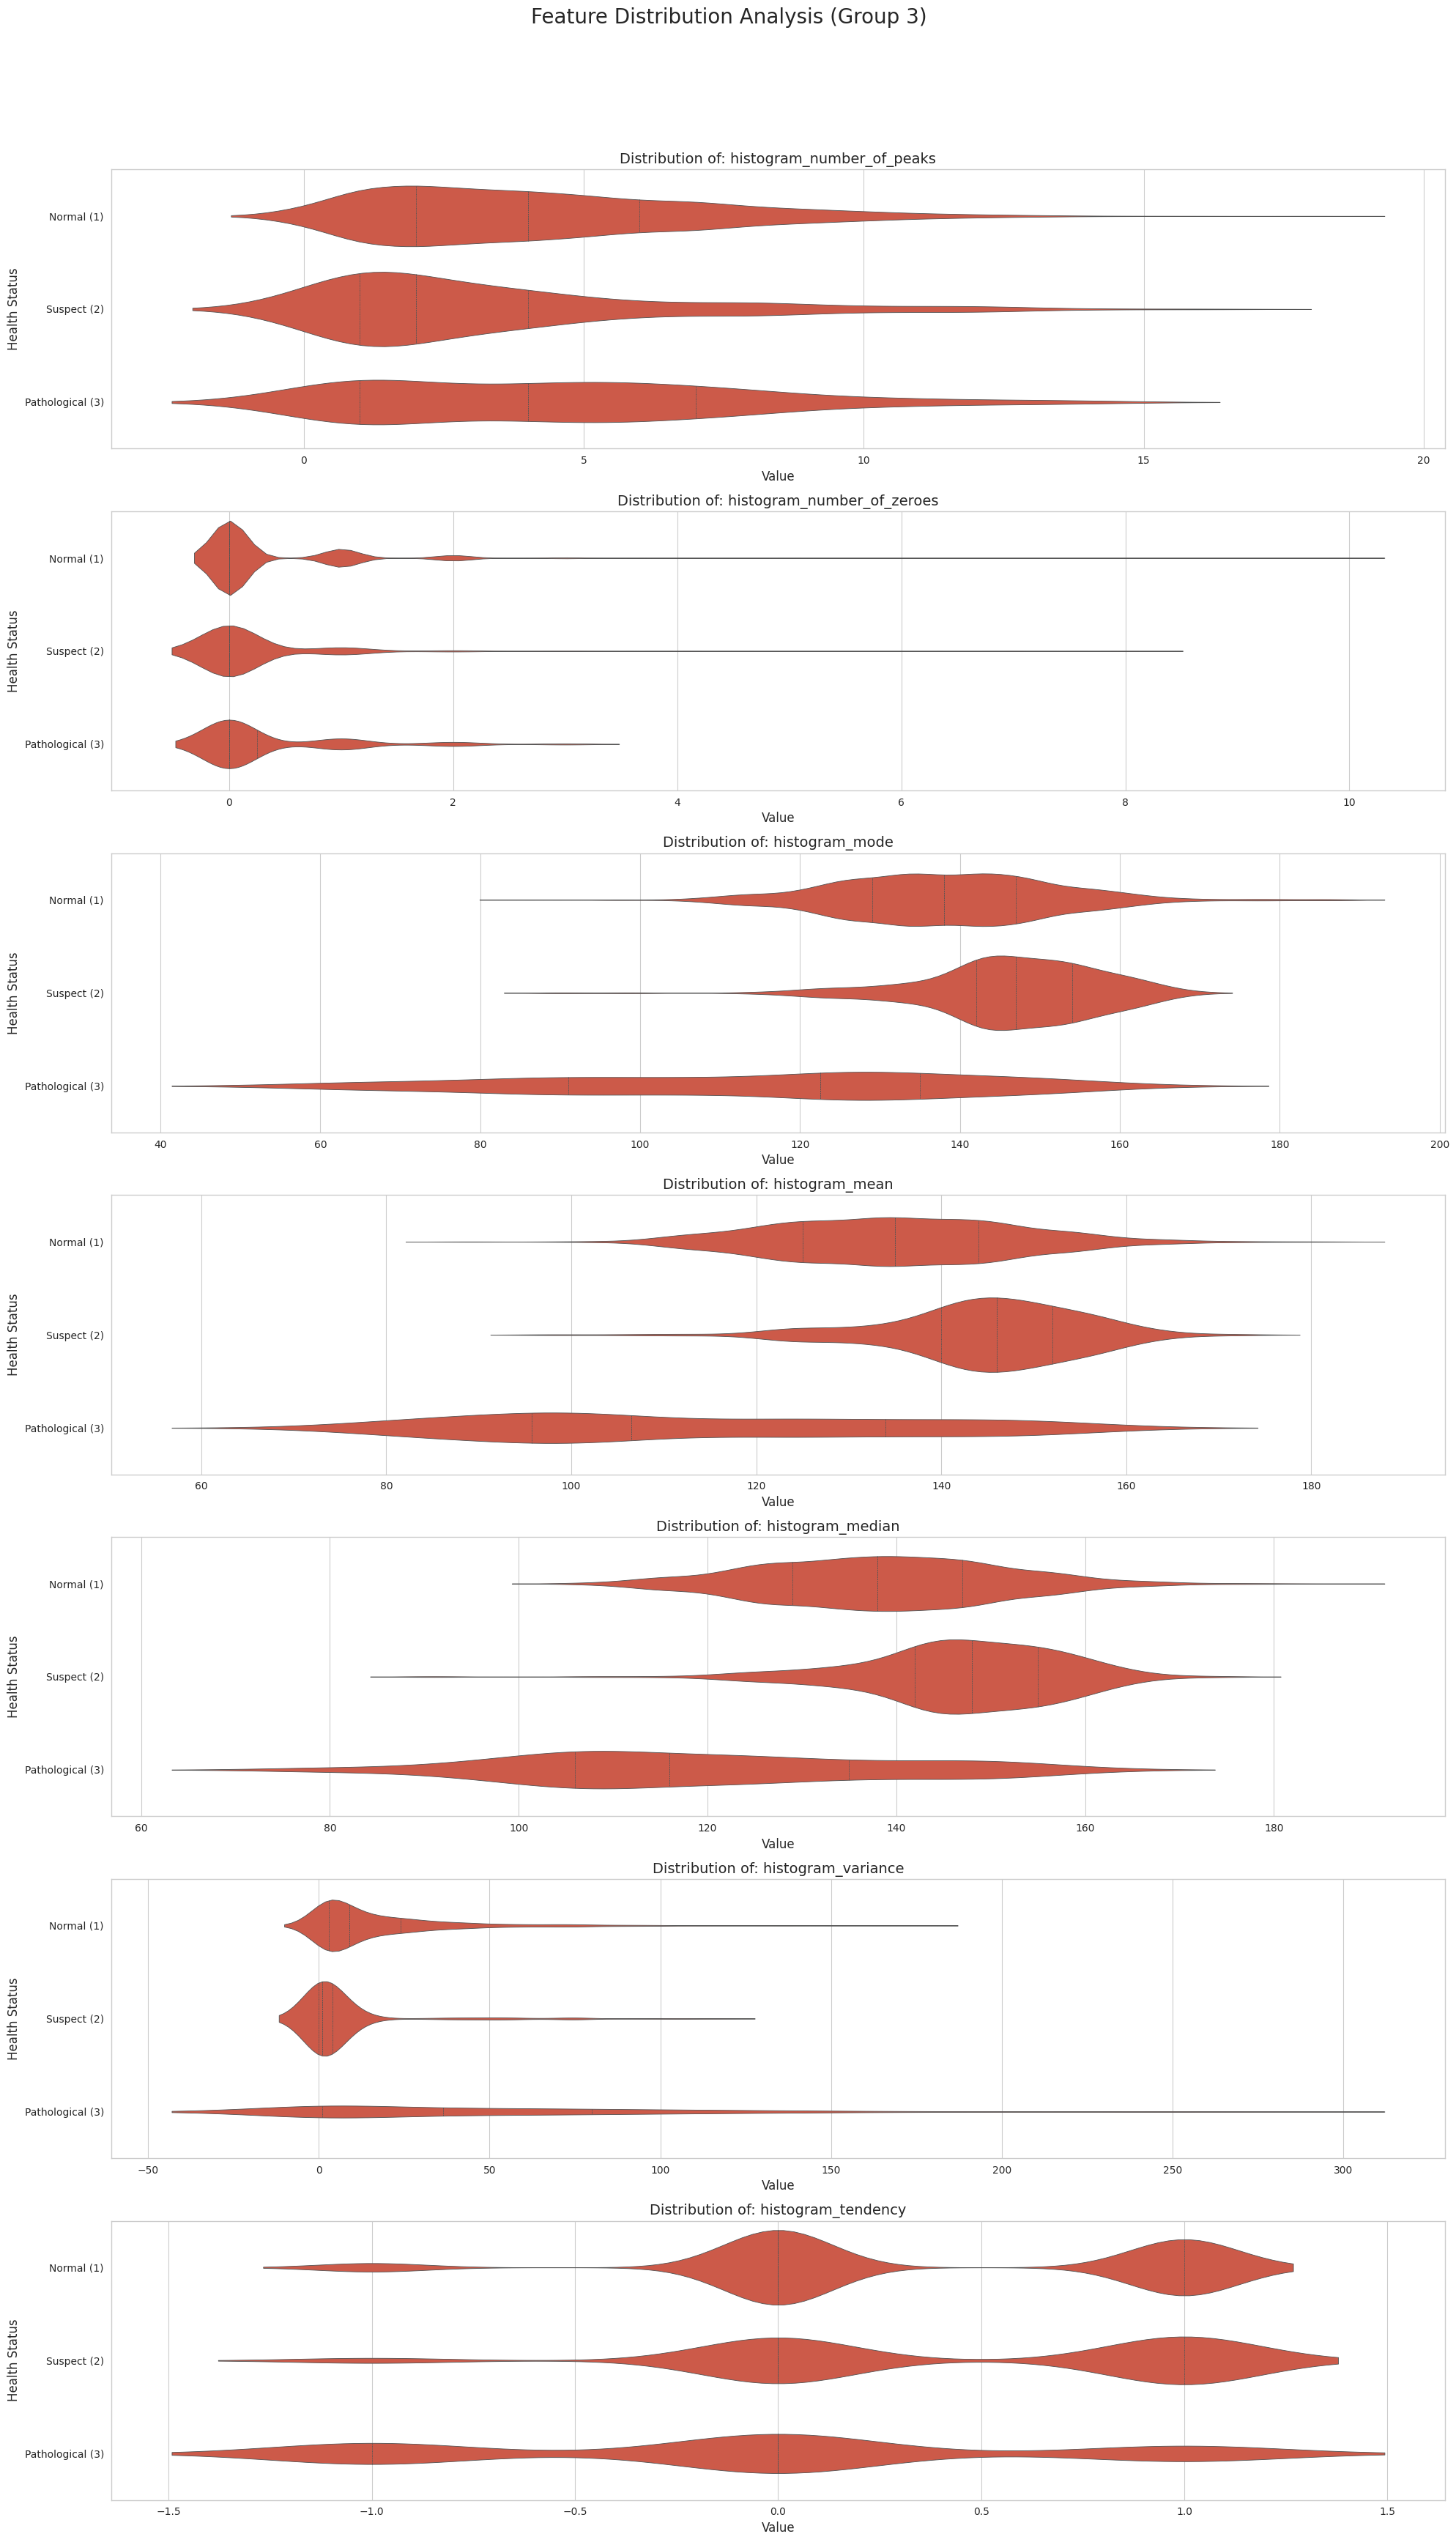

In [12]:
#@title 6. [EDA 보강] 피처별 분포 시각화 (Violin Plots) (영문)

# ----------------------------------------------------------------------
# [보강된 EDA]
# 원본 코드의 개별 히스토그램 대신,
# 각 피처가 3개의 타겟 클래스(Normal, Suspect, Pathological)에 따라
# 어떻게 다르게 분포하는지 Violin Plot으로 시각화합니다.
# (피처가 많으므로 몇 개의 그룹으로 나누어 출력합니다.)
# ----------------------------------------------------------------------

# 타겟 변수와 시각화용 레이블을 제외한 피처 컬럼 목록
features = df.columns.drop(['fetal_health', 'target_label'])

# 피처를 3개의 그룹으로 나누어 시각화 (한 번에 너무 많으면 보기 어려움)
feature_groups = np.array_split(features, 3)

print("Plotting Feature Distributions across Target Classes (Violin Plots)...")

for i, group in enumerate(tqdm(feature_groups, desc="Plotting Groups")):

    num_features = len(group)
    plt.figure(figsize=(20, 5 * num_features))
    plt.suptitle(f'Feature Distribution Analysis (Group {i+1})', fontsize=20, y=1.02)

    for j, feature in enumerate(group):
        ax = plt.subplot(num_features, 1, j + 1)
        sns.violinplot(
            data=df,
            x=feature,
            y='target_label',
            order=['Normal (1)', 'Suspect (2)', 'Pathological (3)'],
            orient='h', # 수평 바이올린 플롯
            inner='quartile' # 중앙값과 사분위수 표시
        )
        ax.set_title(f'Distribution of: {feature}', fontsize=14)
        ax.set_xlabel('Value', fontsize=12)
        ax.set_ylabel('Health Status', fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

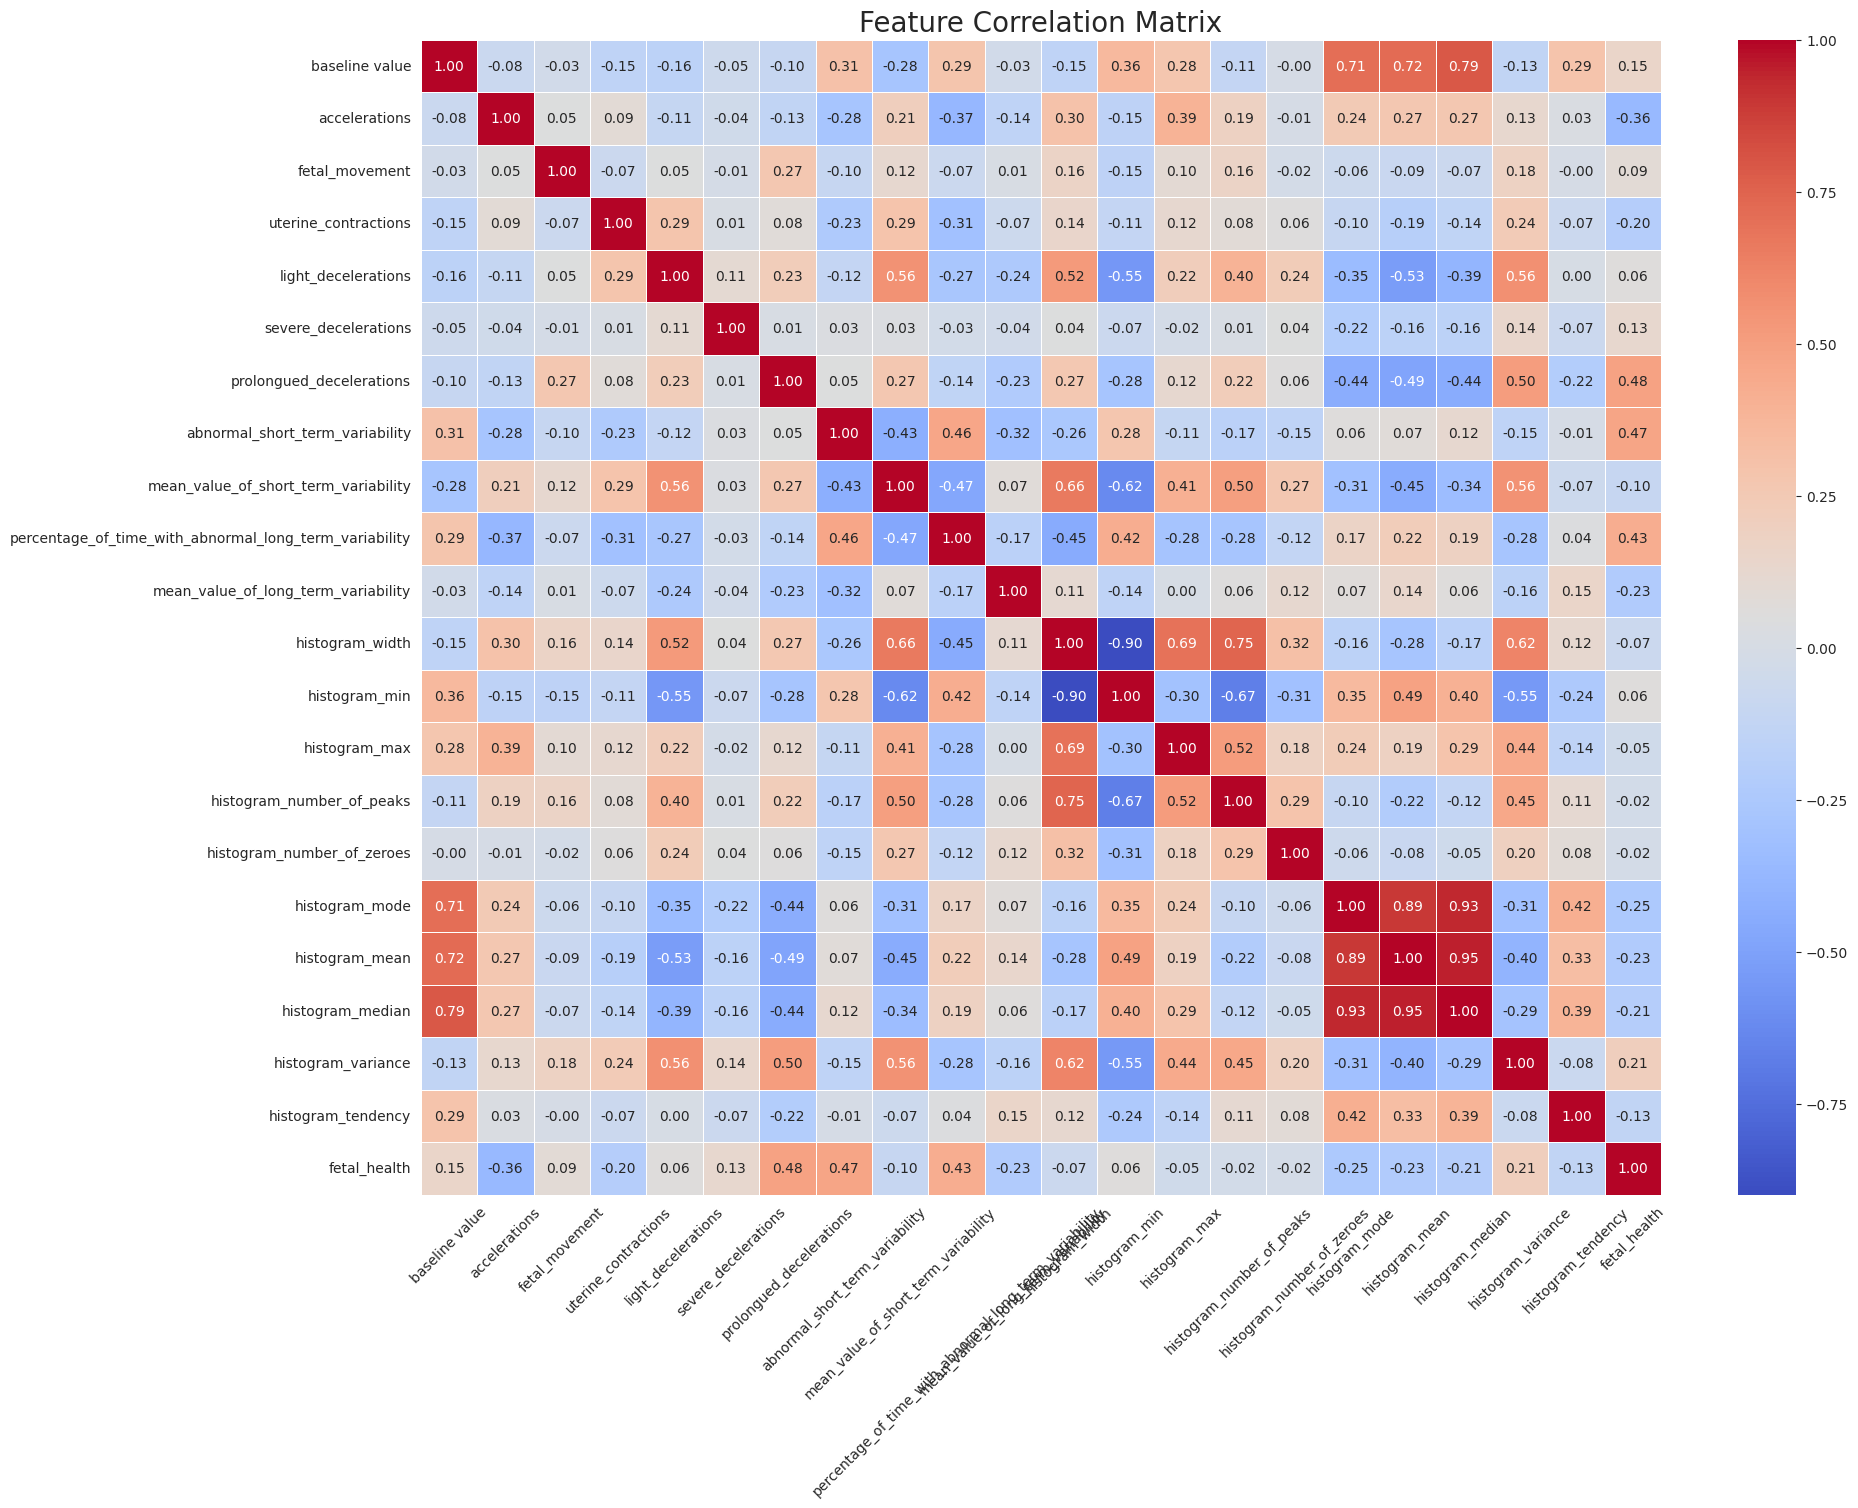

In [13]:
#@title 7. [EDA] 피처 상관관계 분석 (Heatmap) (영문)

# 시각화에 사용했던 'target_label' 컬럼은 제거하고 히트맵 생성
features_only_df = df.drop(columns=['target_label'])

plt.figure(figsize=(20, 15))
corr_matrix = features_only_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Feature Correlation Matrix', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [14]:
#@title 8. 데이터 전처리 (스케일링 및 분리)

# 1. X (Features) / y (Target) 분리
X = df.drop(columns=['fetal_health', 'target_label'])
y = df['fetal_health']

# 2. Target 변수 인덱싱 (1, 2, 3 -> 0, 1, 2)
# (대부분의 머신러닝 모델은 0-based index를 선호합니다)
y = y.map({1.0: 0, 2.0: 1, 3.0: 2})
class_names_eng = ['Normal', 'Suspect', 'Pathological'] # dtreeviz 시각화를 위한 영문 이름

# 3. 데이터 스케일링 (StandardScaler)
# (트리 기반 모델은 영향이 적지만, Logistic Regression 등에는 필수적입니다)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 학습 / 테스트 데이터 분리 (Train / Test Split)
# (stratify=y: 원본 데이터의 클래스 비율(불균형)을 유지하며 분리)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Original X shape: {X.shape}")
print(f"Scaled X shape:   {X_scaled.shape}")
print(f"X_train shape:    {X_train.shape}")
print(f"X_test shape:     {X_test.shape}")
print(f"\nTarget classes (mapped): {y.unique()}")

Original X shape: (2126, 21)
Scaled X shape:   (2126, 21)
X_train shape:    (1700, 21)
X_test shape:     (426, 21)

Target classes (mapped): [1 0 2]


In [15]:
#@title 9. [비교] 다중 모델 학습 및 평가
# 원본 코드의 모델 비교 파트

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0) # verbose=0 (학습 로그 끄기)
}

results = {}

print("--- Training and Evaluating Multiple Models ---")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Accuracy for {name}: {accuracy * 100:.2f}%\n")

# 결과 비교
print("\n--- Model Comparison Summary (Accuracy) ---")
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

--- Training and Evaluating Multiple Models ---
Training Logistic Regression...
Accuracy for Logistic Regression: 88.50%

Training Random Forest...
Accuracy for Random Forest: 92.72%

Training XGBoost...
Accuracy for XGBoost: 93.66%

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.250726
[LightGBM] [Info] Start training from score -1.974552
[LightGBM] [Info] Start training from score -2.489624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy for LightGBM: 94.37%

Training CatBoost...
Accuracy for CatBoost: 93.90%

In [17]:
#@title 10. [결과 분석] Random Forest 집중 분석 (성능 리포트)
# 원본 코드와 같이, 성능이 우수한 Random Forest 모델을 기준으로 상세 분석

print("--- Detailed Analysis: Random Forest Classifier ---")
# Random Forest 모델 (이미 학습됨)
rf_model = models["Random Forest"]

# 테스트 데이터 예측
y_pred_rf = rf_model.predict(X_test)

# 1. Classification Report (분류 리포트)
# (영문 타겟 이름 사용)
print("\n[Classification Report (English)]")
print(classification_report(y_test, y_pred_rf, target_names=class_names_eng))

--- Detailed Analysis: Random Forest Classifier ---

[Classification Report (English)]
              precision    recall  f1-score   support

      Normal       0.94      0.98      0.96       332
     Suspect       0.85      0.68      0.75        59
Pathological       0.86      0.86      0.86        35

    accuracy                           0.93       426
   macro avg       0.88      0.84      0.86       426
weighted avg       0.92      0.93      0.92       426




Plotting Confusion Matrix (Random Forest)...


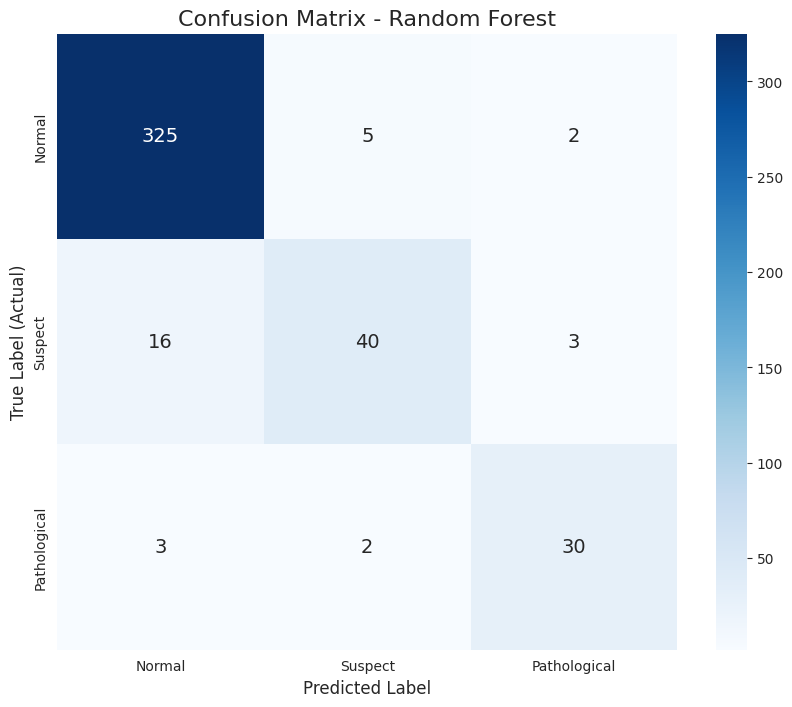

In [18]:
#@title 11. [결과 시각화] 혼동 행렬 (Confusion Matrix) (영문)

print("\nPlotting Confusion Matrix (Random Forest)...")

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_eng,
            yticklabels=class_names_eng,
            annot_kws={"size": 14})

plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.ylabel('True Label (Actual)', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()